# REGION OF INTEREST (ROI) - Tracé de l'intensité du l'image corrigée en fonction de la biommasse

 ### Bibliothèques

In [77]:
import numpy as np
import matplotlib.pyplot as plt

### Chargement de ROI - COORDONNEES

In [76]:
def loadParcels(num = None):
    
    if num == None: # On charge toutes les parcelles dans une liste
        parcels = []
        for i in range(1,17):
            #parcels.append(np.loadtxt("../data/16ROI/indcsROI_PAR" +"{:02d}".format(i)+ ".dat"))
            parcels.append(np.loadtxt("indcsROI_PAR" +"{:02d}".format(i)+ ".dat"))
        return [x.astype(int) for x in parcels]
    else: #  On charge uniquemnent la parcelle numéro "num"
        #parcel = np.loadtxt("../data/16ROI/indcsROI_PAR" +"{:02d}".format(num)+ ".dat")
        parcel = np.loadtxt("indcsROI_PAR" +"{:02d}".format(num)+ ".dat")
        return parcel.astype(int)

### Chargement des ROI - BIOMASSE

In [75]:
def loadBiomass(num = None):
    if num == None : 
        bmssList = np.loadtxt("16insituAGB.dat")
    else:
        l = np.loadtxt("16insituAGB.dat")
        bmssList = l[num - 1]
    return bmssList

### Affichage des ROI

In [74]:
def plotParcels(num = None):
    band2 = np.loadtxt("band2.txt")
    #band2x = 10 * np.log(band2)
    plt.figure(1)
    plt.imshow(band2)
    if num == None :
        Parcels = loadParcels()
        for i in range(16):
            X = Parcels[i]
            plt.scatter(X[:,0], X[:,1])
            plt.savefig("parcel.png")
    else:
        X = loadParcels(num)
        print(np.shape(X))
        plt.scatter(X[:,0], X[:,1])
        plt.savefig("parcel.png")

None


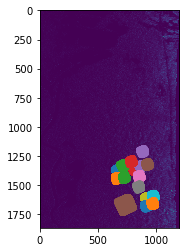

In [73]:
test = plotParcels()
print(test)

### Moyenne des déplacements 

In [6]:
def mean(tabx,taby):
    Sx,Sy = 0,0
    for i in tabx:
        Sx += i
    for j in taby:
        Sy += j
    mx = Sx/len(tabx)
    my = Sy/len(taby)
    return mx,my

In [7]:
def shiftImage(mx,my):
    pass

### Valeurs des intensités : image BAND 2 corrigée

In [8]:
def Intensities(band1shiftee,band2):
    band2corr = band2 / band1shiftee
    return band2corr

In [9]:
band1 = np.loadtxt("band1.txt")
band2 = np.loadtxt("band2.txt")

<ipython-input-8-99ad4811c709>:2: RuntimeWarning: invalid value encountered in true_divide
  band2corr = band2 / band1shiftee


0.11034499890969171


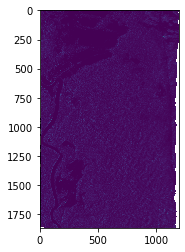

In [64]:
img = Intensities(band1,band2)
plt.imshow(img)
print(img[500,500])

### Intensité d'une zone particulière

In [72]:
def IntensityZone(X,img): # programme juste
    IntTab = []
    n,m = np.shape(X)
    for i in range(n):
        IntTab.append(img[X[i][1],X[i][0]])
    Intmean = np.mean(np.array(IntTab))
    return Intmean, IntTab

### Triage des couples Biomasse-Intensité

In [67]:
def sortBiomInt(BiomassData,IntensityData):
    dataList = []
    finalList = []
    
    for i in range(len(BiomassData)):
        dataList.append( ( BiomassData[i] , IntensityData[i] ) )
    sortedList = sorted(dataList)
    
    for i in range(len(sortedList)):
        finalList.append( [ sortedList[i][0] , sortedList[i][1] ] )
    
    return np.array(finalList)

### Programme Principal

[[2.57500000e+02 6.82836908e-02]
 [2.84700000e+02 8.27286772e-02]
 [3.00500000e+02 7.41840126e-02]
 [3.04300000e+02 9.59618762e-02]
 [3.07500000e+02 8.68305907e-02]
 [3.09000000e+02 9.31305740e-02]
 [3.37500000e+02 9.00618896e-02]
 [3.46400000e+02 8.94452455e-02]
 [3.69600000e+02 8.94557455e-02]
 [3.92400000e+02 9.45753827e-02]
 [4.02700000e+02 1.04297288e-01]
 [4.05300000e+02 1.00102912e-01]
 [4.06100000e+02 8.35714349e-02]
 [4.07700000e+02 8.91537187e-02]
 [4.17800000e+02 8.43790272e-02]
 [4.31900000e+02 1.09225444e-01]]
---------------------------------------------


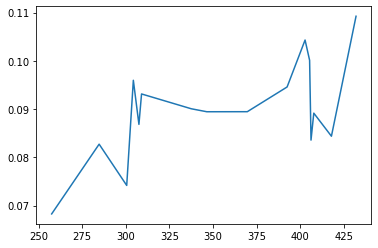

In [71]:
main(img)